# Notebook for data exploration

In [66]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### Dataset configuration :

$$
M_{\text{data}} = M_{\text{train}} \cup M_{\text{test}} \cup M_{\text{eval}},
\qquad M_{\text{data}},\, M_{\text{train}},\, M_{\text{test}},\, M_{\text{eval}} \in \mathbb{R}^{n \times m} \\

M_{\text{train}} \cap M_{\text{test}} = 
M_{\text{train}} \cap M_{\text{eval}} = 
M_{\text{test}} \cap M_{\text{eval}} = \varnothing,
\qquad
$$


In [67]:
# -- Data Loading --
namesngenre = np.load('../data/namesngenre.npy')
df_namesngenre = pd.DataFrame(namesngenre, columns=['name', 'genre'])

ratings_test = np.load('../data/ratings_test.npy')
ratings_train = np.load('../data/ratings_train.npy')

# -- Stats --
n, m = ratings_train.shape[0], ratings_train.shape[1]
mask_train = ~np.isnan(ratings_train)
mask_test = ~np.isnan(ratings_test)
print(f"Proportion of train ratings : {(np.sum(mask_train) / (n * m))*100:.2f}%")
print(f"Proportion of test ratings : {(np.sum(mask_test) / (n * m))*100:.2f}%")
print(f"Length of the NamesnGenre dataset : {len(df_namesngenre)}")
df_namesngenre.head(10)

Proportion of train ratings : 1.04%
Proportion of test ratings : 1.04%
Length of the NamesnGenre dataset : 4980


,name,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
5,Heat (1995),Action|Crime|Thriller
6,Sabrina (1995),Comedy|Romance
7,Tom and Huck (1995),Adventure|Children
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller


In [68]:
# -- Fusion --
ratings = np.copy(ratings_train)
intersection = np.sum(mask_train & mask_test)
print(f"Intersection check : {intersection}")
ratings[mask_test] = ratings_test[mask_test]

mask_ratings = ~np.isnan(ratings)
print(f"Proportion of ratings : {(np.sum(mask_ratings) / (n * m))*100:.2f}%")

Intersection check : 0
Proportion of ratings : 2.08%


### Exploration NamesnGenre

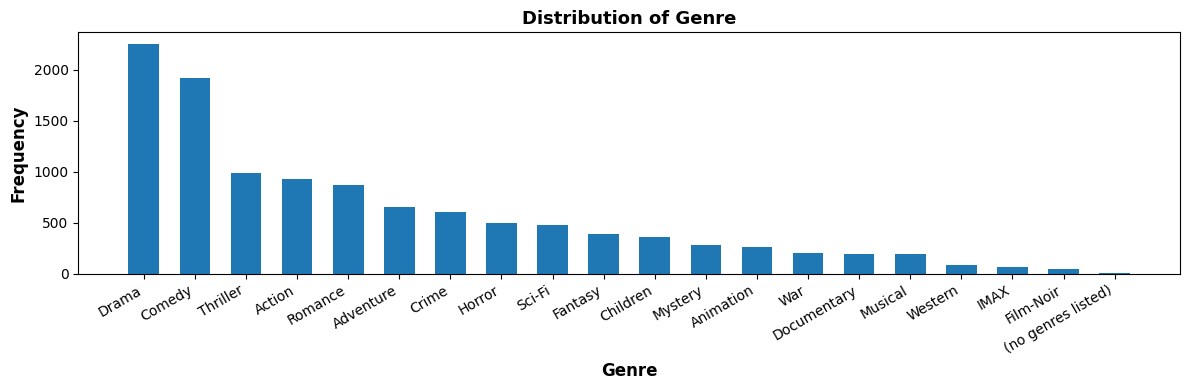

In [69]:
all_genders = [nom for sous_liste in df_namesngenre["genre"].apply(lambda x: x.split("|")).apply(lambda x: x) for nom in sous_liste]
count_genders = Counter(all_genders)
genders = list(count_genders.keys())
frequencies = list(count_genders.values())
sorted_pairs = sorted(zip(genders, frequencies), key=lambda x: x[1], reverse=True)
genders, frequencies = zip(*sorted_pairs)


plt.figure(figsize=(12, 4))
plt.bar(genders, frequencies,  width=0.6)

plt.xlabel("Genre", fontsize=12, weight='bold')
plt.xticks(rotation=30, ha='right', fontsize=5)
plt.ylabel("Frequency", fontsize=12, weight='bold')
plt.title("Distribution of Genre", fontsize=13, weight='bold')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()

plt.show()



In [70]:
print(f"Shape of the rating matrix : {ratings.shape}")
print(f"Avg rate over the train set : {np.nanmean(ratings):.1f}/5")
print(f"Min | Max : {np.nanmax(ratings)}/5 | {np.nanmin(ratings)}/5")

Shape of the rating matrix : (610, 4980)
Avg rate over the train set : 3.5/5
Min | Max : 5.0/5 | 0.5/5


Sparsity proportion : 97.92%


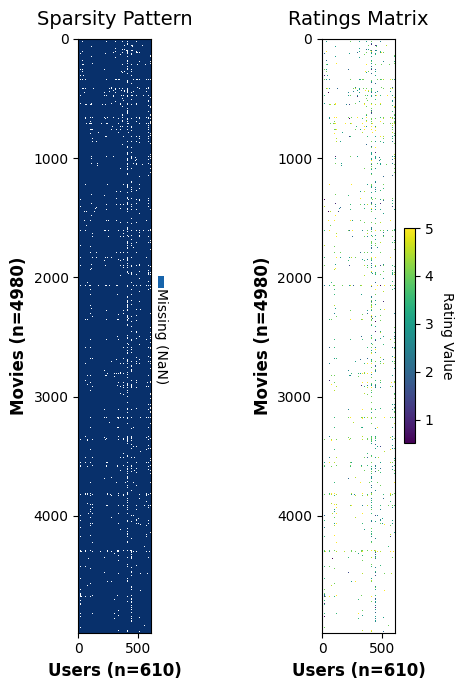

In [71]:
n_users, n_movies = ratings.shape  

sparsity_matrix = np.isnan(ratings).T
print(f"Sparsity proportion : {(np.sum(sparsity_matrix) / (sparsity_matrix.shape[0] * sparsity_matrix.shape[1]))*100:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(5, 7))

im1 = axes[0].imshow(sparsity_matrix, interpolation='nearest', cmap='Blues')
axes[0].set_xlabel(f'Users (n={n_users})', fontsize=12, weight='bold')
axes[0].set_ylabel(f'Movies (n={n_movies})', fontsize=12, weight='bold')
axes[0].set_title('Sparsity Pattern', fontsize=14, pad=10)
axes[0].grid(False)

nan_patch = mpatches.Patch(color=plt.cm.Blues(0.8), label='Missing (NaN)')

x_anchor = 1.1  
y_anchor = 0.5  

axes[0].add_patch(mpatches.Rectangle(
    (n_users * x_anchor, n_movies * (y_anchor - 0.1)), 
    width=n_users * 0.08,
    height=n_movies * 0.02,
    facecolor=plt.cm.Blues(0.8),
    edgecolor='none',
    transform=axes[0].transData,
    clip_on=False
))

axes[0].text(
    n_users * (x_anchor + 0.03),
    n_movies * y_anchor,
    "Missing (NaN)",
    rotation=-90,
    va='center',
    ha='center',
    fontsize=10,
    color='black'
)

im2 = axes[1].imshow(ratings.T, interpolation='nearest', cmap='viridis')
axes[1].set_xlabel(f'Users (n={n_users})', fontsize=12, weight='bold')
axes[1].set_ylabel(f'Movies (n={n_movies})', fontsize=12, weight='bold')
axes[1].set_title('Ratings Matrix', fontsize=14, pad=10)
axes[1].grid(False)

cbar = fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar.set_label('Rating Value', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


### Users behavior :

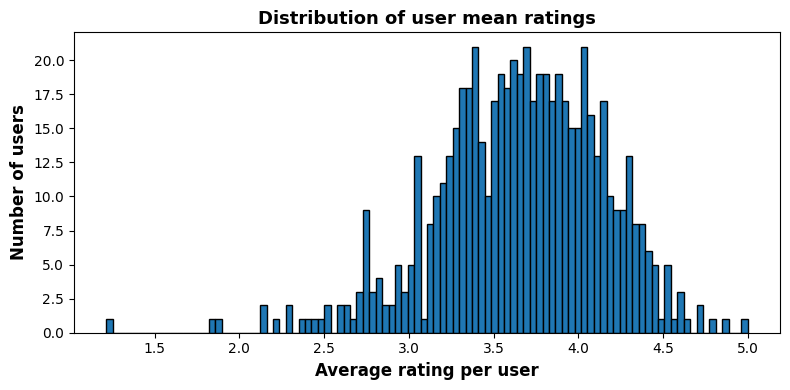

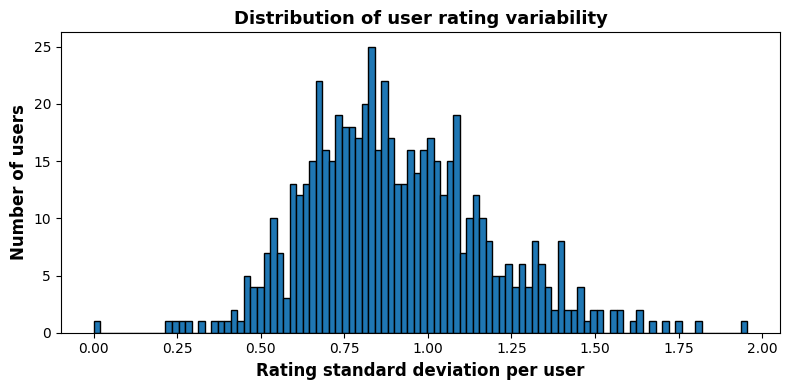

In [72]:
user_means = np.nanmean(ratings, axis=1)

plt.figure(figsize=(8, 4))
plt.hist(user_means, bins=100,  edgecolor='black')
plt.xlabel("Average rating per user", fontsize=12, weight='bold')
plt.ylabel("Number of users", fontsize=12, weight='bold')
plt.title("Distribution of user mean ratings", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

user_stds = np.nanstd(ratings, axis=1)

plt.figure(figsize=(8, 4))
plt.hist(user_stds, bins=100,  edgecolor='black')
plt.xlabel("Rating standard deviation per user", fontsize=12, weight='bold')
plt.ylabel("Number of users", fontsize=12, weight='bold')
plt.title("Distribution of user rating variability", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

- Distribution très large et étalée (mean & variance) -> les utilisateurs n'utilisent clairement pas la même échelle de ratings.

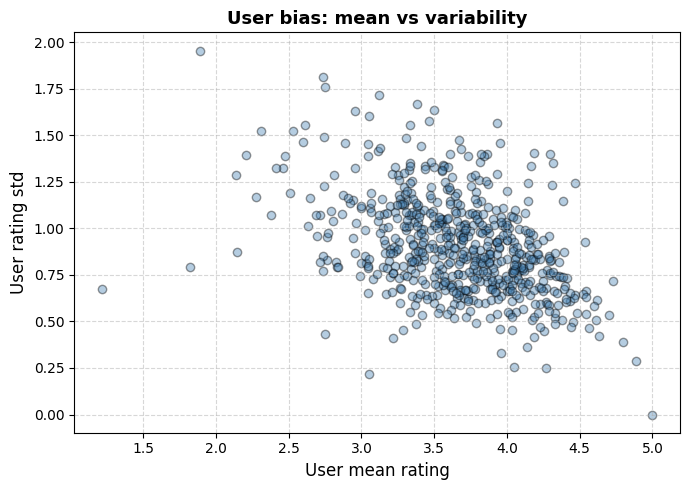

In [73]:
plt.figure(figsize=(7, 5))
plt.scatter(user_means, user_stds, alpha=0.4, color='steelblue', edgecolor='black')
plt.xlabel("User mean rating", fontsize=12)
plt.ylabel("User rating std", fontsize=12)
plt.title("User bias: mean vs variability", fontsize=13, weight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- En bas à gauche → utilisateurs “exigeants” mais cohérents (notes basses, peu de variance).
- En bas à droite → utilisateurs “bienveillants” (notes hautes, faible variance).
- Dispersés → diversité de comportements = besoin d'un centrage.

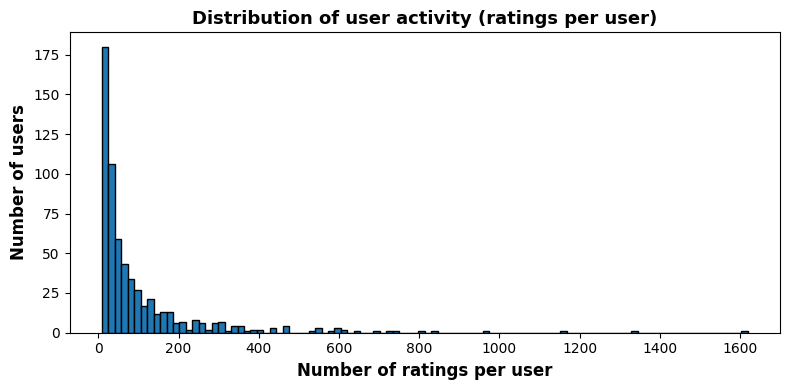

In [74]:
ratings_per_user = np.sum(~np.isnan(ratings), axis=1)

plt.figure(figsize=(8, 4))
plt.hist(ratings_per_user, bins=100, edgecolor='black')
plt.xlabel("Number of ratings per user", fontsize=12, weight='bold')
plt.ylabel("Number of users", fontsize=12, weight='bold')
plt.title("Distribution of user activity (ratings per user)", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

- Beaucoup d’utilisateurs ont très peu de notes, quelques utilisateurs très actifs
- Filtrage des utilisateurs trop rares ?

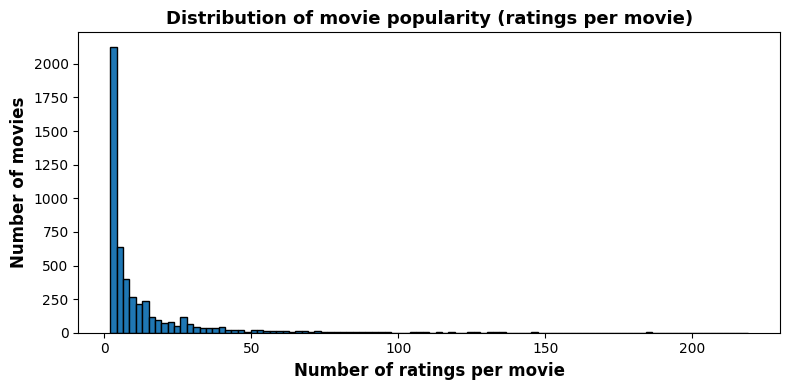

In [75]:
ratings_per_movie = np.sum(~np.isnan(ratings), axis=0)

plt.figure(figsize=(8, 4))
plt.hist(ratings_per_movie, bins=100, edgecolor='black')
plt.xlabel("Number of ratings per movie", fontsize=12, weight='bold')
plt.ylabel("Number of movies", fontsize=12, weight='bold')
plt.title("Distribution of movie popularity (ratings per movie)", fontsize=13, weight='bold')
plt.tight_layout()
plt.show()

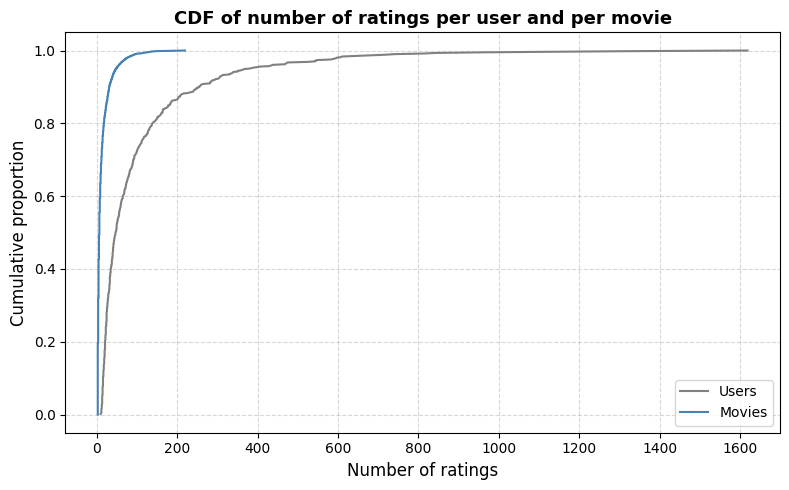

In [76]:
def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    y = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, y, label=label, color=color)

plt.figure(figsize=(8, 5))
plot_cdf(ratings_per_user, "Users", "gray")
plot_cdf(ratings_per_movie, "Movies", "steelblue")
plt.xlabel("Number of ratings", fontsize=12)
plt.ylabel("Cumulative proportion", fontsize=12)
plt.title("CDF of number of ratings per user and per movie", fontsize=13, weight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Recap pour le pre-processing :

- Normalization / Centrage :

Les utilisateurs n’utilisent pas les mêmes échelles (certains notent toujours haut, d’autres bas). Centrer les ratings par utilisateur
Plot Histogramme avant/après

- Regularization :

Légère de la sparsité pour stabiliser les gradient, Ajouter quelques valeurs pseudo-observées.

- Filtrage :

Filtrer utilisateurs/films trop rares

In [77]:
import sys
import os

root_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
if root_path not in sys.path:
    sys.path.append(root_path)

from data_pre_processing import DataPreprocessor

data_preprocessor = DataPreprocessor()
ratings_preprocessed = data_preprocessor.preprocess(matrix=ratings, min_ratings_item=5, min_ratings_user=5)

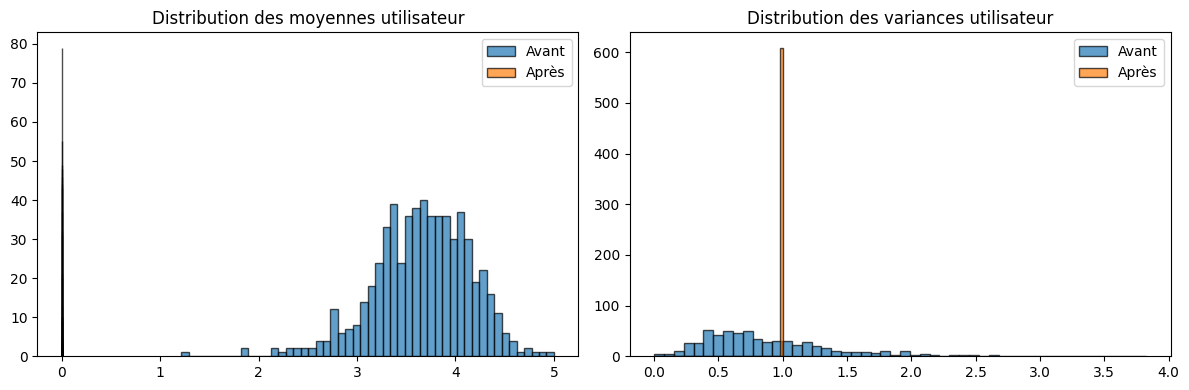

In [78]:
user_means_before = np.nanmean(ratings, axis=1)
user_vars_before = np.nanvar(ratings, axis=1)

user_means_after = np.nanmean(ratings_preprocessed, axis=1)
user_vars_after = np.nanvar(ratings_preprocessed, axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(user_means_before, bins=50, alpha=0.7, label='Avant', edgecolor='black')
axes[0].hist(user_means_after, bins=50, alpha=0.7, label='Après', edgecolor='black')
axes[0].set_title('Distribution des moyennes utilisateur')
axes[0].legend()

axes[1].hist(user_vars_before, bins=50, alpha=0.7, label='Avant', edgecolor='black')
axes[1].hist(user_vars_after, bins=50, alpha=0.7, label='Après', edgecolor='black')
axes[1].set_title('Distribution des variances utilisateur')
axes[1].legend()

plt.tight_layout()
plt.show()


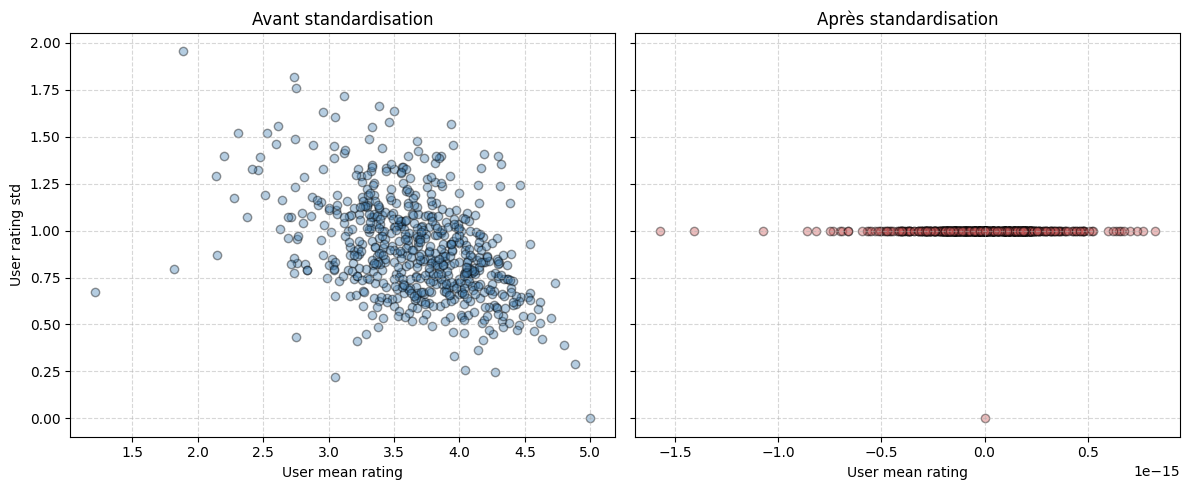

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].scatter(user_means, user_stds, alpha=0.4, color='steelblue', edgecolor='black')
axes[0].set_title("Avant standardisation")
axes[0].set_xlabel("User mean rating")
axes[0].set_ylabel("User rating std")
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(user_means_after, np.sqrt(user_vars_after), alpha=0.4, color='indianred', edgecolor='black')
axes[1].set_title("Après standardisation")
axes[1].set_xlabel("User mean rating")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
